## CSCE 676 :: Data Mining and Analysis :: Texas A&M University :: Spring 2022


# Homework 3

- **100 points [7% of your final grade]**
- **Due April 10, 2022 by 11:59pm**

*Goals of this homework:* In this homework, you will investigate data visualization and the foundations of recommendation.



*Submission instructions:* This homework is a bit different from the previous ones. For the visualizatin component, you will post to Campuswire. See below for details. For the recommendation component, rename this notebook as `UIN_hw3.ipynb`. For example, if your UIN is `123456789`, then your homework submission would be `123456789_hw2.ipynb`. Submit this notebook via Canvas. Your notebook should be completely self-contained, with the results visible in the notebook. We should not have to run any code from the command line, nor should we have to run your code within the notebook (though we reserve the right to do so). So please run all the cells for us, and then submit. 

*Late policy:* No late days for the data visualization. For the recommendaiton, you may use up to three of your late days. No homeworks will be accepted after April 13 11:59pm.

## Collaboration Declaration:

* Part 1: I needed a way to avoid nan values to compute the mean, so I took help from StackOverflow to find nanmean function. Also, it pointed me to this link
https://www.nbshare.io/notebook/160784578/How-To-Handle-nan-In-Numpy/

* part 1: I got help to pivot table using multiple columns using the insights from this link
https://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/

* Part 3b: I took help from Rohan Chaudhury about torch approach to make it run faster. 

* Part 3e: I took help from the below links to understand the update to user latent factor and movie latent factor.
https://datajobs.com/data-science-repo/Collaborative-Filtering-[Koren-and-Bell].pdf
https://people.engr.tamu.edu/huangrh/Spring16/papers_course/matrix_factorization.pdf


## (30 points) Part 1: Data Visualization (submit to Campuswire, no late days)

For this first part, you will create a data visualization based on an exploration of a dataset we provide. Your visualization should capture Tufte's principles of graphical excellence: "complex ideas communicated with clarity, precision, and efficiency."

### The Data
You must choose one of the following datasets:

* Police Shootings: The Washington Post's database contains records of every fatal shooting in the United States by a police officer in the line of duty since Jan. 1, 2015
    * [data](https://github.com/washingtonpost/data-police-shootings)
    * [website](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/) (including some example charts)

* Bike Sharing: This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.
    * [data](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)

* Tennis Time: A dataset of tennis players and how much time they take.
    * [data](https://github.com/fivethirtyeight/data/tree/master/tennis-time)
    * [article](https://fivethirtyeight.com/features/why-some-tennis-matches-take-forever/)

### Your Goal
1. Identify an interesting story or insight from this data
2. Carefully design a data visualization that communicates this story.

You may assume that your audience is the **general public.**

You may clean, manipulate, and transform the data as you like. You are free to use external data from whatever sources you like. (But be sure to cite them!). Feel free to use as little or as much data as you like, so long as the story (and associated data visualization are compelling). 


### What to Submit

Utimately you should produce:


1. A single image (e.g., PNG, PDF, JPG) that effectively communicates the data. You must use a Python visualization toolkit as your key tool, but you are welcome to augment with other tools if you like (e.g., Photoshop, MS Paint, GIMP). For Python viz tools, you may use matplotlib, plotly, seaborn, geoplotlib, bokeh, networkx, or whatever else you can find.
    
2. A brief explanation describing your design. (a few paragraphs, 1/2 page or so).

Your explanation should justify the design choices you have made. 

* Why did you choose the particular visualization type? 
* What motivated your choice of size, color,
and scale? 
* Why are they appropriate for what you are trying to communicate?
* Additionally, your explanation should document:
    * What you are trying to
communicate
    * The benefits of your choice of visualization
    * As well as any downsides
to your viz (e.g., are certain connections downplayed due to your choices?).

### How to Submit
You should post your image + explanation to Campuswire by April 10 (no late days).

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
trips = pd.read_csv('sample_data/hour.csv',
                    infer_datetime_format=True)

In [ ]:
# expand each ride into a single row
casual = trips.loc[trips.index.repeat(trips.casual)][['hr', 'workingday', 'dteday']]
casual['type'] = 'casual'
registered = trips.loc[trips.index.repeat(trips.registered)][['hr', 'workingday', 'dteday']]
registered['type'] = 'registered'
all_rides = pd.concat([casual, registered])
all_rides['row_id'] = np.arange(len(all_rides))
# pivot table to date as row and multi index column out of combination of type, workingday(0 or 1) and hour
# for e.g columns are of type ('casual', 0, 1) indicates count of rides for casual type, holidays and 1st hour of day
hourly = all_rides.pivot_table('row_id', aggfunc='count',
                            index=['dteday'], columns=['type', 'workingday', 'hr'])

In [ ]:
!mkdir -p results

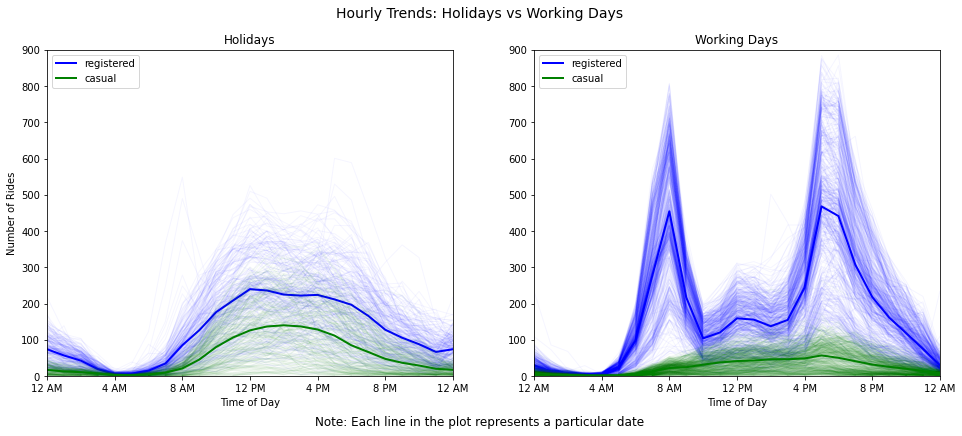

In [ ]:
def getTimeString(x):
  if x == 12:
    return "12 PM"
  elif x == 0:
    return "12 AM"
  elif x == 24:
    return "12 AM"  
  elif x <12:
    return str(x) + " AM"
  else:
    return str(x-12) + " PM"    


fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=False)
fig.subplots_adjust(wspace=0.2)
format = plt.FuncFormatter(lambda x, *args: '{0}'.format(getTimeString(int(x))))

colors = ['b', 'g']
for workingday in (1, 0):
    day_type = ax[workingday]
    for i, col in enumerate(['registered', 'casual']):
        values = hourly[col][workingday].values
        values = np.hstack([values, values[:, :1]])
        day_type.plot(range(25), values.T,
                 color=colors[i], lw=1, alpha=0.04)
        day_type.plot(range(25), np.nanmean(values, 0),
                 color=colors[i], lw=2, label=col)
    day_type.xaxis.set_major_locator(plt.MultipleLocator(4))
    day_type.xaxis.set_major_formatter(format)
    day_type.set_ylim(0, 900)
    day_type.legend(loc='upper left')
    day_type.set_xlabel('Time of Day')
    day_type.set_title('Working Days' if workingday ==1 else 'Holidays')
    #day_type.grid()
    day_type.margins(x=0)
ax[0].set_ylabel('Number of Rides')
# ax[0].annotate('Each Line represents a date', xy =(17, 500),
#                 xytext =(10, 700), 
#                 arrowprops = dict(facecolor ='green', arrowstyle = "->"))
plt.figtext(0.5, 0.01, "Note: Each line in the plot represents a particular date", ha="center", fontsize=12)

fig.suptitle('Hourly Trends: Holidays vs Working Days', size=14)
fig.savefig('results/bike_sharing_trend.png', bbox_inches='tight')

- **Goal**

Following shows hourly trends comparison between registered and casual users for weekdays vs holidays

- **Choices** 

  - I have chosen multiple line plots to visualize this. Each line plot here correspond to number of rides in a day through each hour.
  Since there are 731 different dates, I'm controlling the transparency using **alpha** parameter. 
  I've taken the mean of all these 731 rows to represent through a single line plot. 

  - Y-axis represents number of rides per day and x-axis covers each hour of the day. X-axis are divided into scale of every 4 hours. This makes it less cluttered than plotting each hour. Y-axis has increments of 100.

  - I have used same scale for both subplots even though holidays subplots have lesser number of relative rides.

  - The line widths is controlled by **lw** parameter, where the transaparent lines have line width of 1 and mean line is of width 2.

- **Inference**

  - Casual users uses bike sharing mostly on holidays relative to registered users.

  - On working days, for registered users there is a spike around 8 AM in the morning and again around 6 PM in the evening. This according to me, seems like due to them using these to commute to work. 

  - on holidays, behavior of both casual and registered users are similar and increases throughout the day. 

  - On working days, casual users uses bike sharing less frequently than the holidays which can mean that they prefer bike sharing mostly for leisure purposes. 


- **Benefits**

  - the choice of two strong colors clearly mark a boundary between two types of users
  - putting both sublots next to each other gives an idea of relative values.
- **Downsides**
  - it gives a general view of trend, however it does not give information about outliers because those points are almost hidden and not visible. 

### Grading Breakdown

- 10%: Interestingness and clarity of question you ask
- 20%: Appropriateness of data, scale, and other viz design choices
- 10%: Legends, context, and titles of your viz
- 20%: Overall quality of your viz: in the extreme, every pixel serves a purpose
- 20%: Design rationale (writeup)
- 20%: Pros and cons of your design (writeup)


## (5 points) Part 2: Data Viz Critique (on Campuswire by April 17)

After all the data visualizations have been posted to Campuswire, you will be responsible for providing a critique of **at least two** data visualizations provided by your classmates. 

You should reply in the thread and provide a brief *constructive* critique. Do your best to load balance, so that every data visualization receives some feedback.

On the final homework, each student will have an opportunity to revise the original data visualization based on this feedback.



## (65 points) Part 3: Recommendation with User Ratings (Explicit Feedback) 

In this part, we focus on the rating prediction recommendation task with explicit feedback. We will:

* load and process the MovieLens 1M dataset, 
* build a baseline estimation model,
* build a collaborative filtering model,
* build a matrix factorization model,
* and try to improve upon these models.

First, we need to load and preprocess the experiment dataset. We use the MovieLens 1M data from https://grouplens.org/datasets/movielens/1m/ in this homework. The code has been provided in the next cell, and you need to run it. The resulting data variables are: train_mat is the numpy array variable for training data of size (#users, #items) with non-zero entries representing user-item ratings, and zero entries representing unknown user-item ratings; and test_mat is the numpy array variable for testing data of size (#users, #items).

In [ ]:
# if you're using colab, this is a clunky way to load the ratings.dat file we need
# navigate in your finder to ratings.dat when asked
from google.colab import files
uploaded = files.upload()

Saving ratings.dat to ratings.dat


In [ ]:
import io
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix

data_df = pd.read_csv(io.BytesIO(uploaded['ratings.dat']), sep='::', names=["UserID", "MovieID", "Rating", "Timestamp"])
# if you are running this notebook locally, you can replace above with something like this:
# data_df = pd.read_csv('./ratings.dat', sep='::', names=["UserID", "MovieID", "Rating", "Timestamp"])

# First, generate dictionaries for mapping old id to new id for users and movies
unique_MovieID = data_df['MovieID'].unique()
unique_UserID = data_df['UserID'].unique()
j = 0
user_old2new_id_dict = dict()
for u in unique_UserID:
    user_old2new_id_dict[u] = j
    j += 1
j = 0
movie_old2new_id_dict = dict()
for i in unique_MovieID:
    movie_old2new_id_dict[i] = j
    j += 1
    
# Then, use the generated dictionaries to reindex UserID and MovieID in the data_df
user_list = data_df['UserID'].values
movie_list = data_df['MovieID'].values
for j in range(len(data_df)):
    user_list[j] = user_old2new_id_dict[user_list[j]]
    movie_list[j] = movie_old2new_id_dict[movie_list[j]]
data_df['UserID'] = user_list
data_df['movieID'] = movie_list


# generate train_df with 70% samples and test_df with 30% samples, and there should have no overlap between them.
train_index = np.random.random(len(data_df)) <= 0.7
train_df = data_df[train_index]
test_df = data_df[~train_index]

# generate train_mat and test_mat
num_user = len(data_df['UserID'].unique())
num_movie = len(data_df['MovieID'].unique())



train_mat = coo_matrix((train_df['Rating'].values, (train_df['UserID'].values, train_df['MovieID'].values)), shape=(num_user, num_movie)).astype(float).toarray()
test_mat = coo_matrix((test_df['Rating'].values, (test_df['UserID'].values, test_df['MovieID'].values)), shape=(num_user, num_movie)).astype(float).toarray()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


## Part 3a: Build the Baseline Estimation Model (15 points)

First, let's implement a simple personalized recommendation model -- the baseline estimate -- introduced in class: $b_{u,i}=\mu+b_i+b_u$, where $\mu$ is the overall mean rating for all items, $b_u$ = average rating of user $u-\mu$, $b_i$ = average rating of item $i-\mu$. Store your prediction as a numpy array variable 'prediction_mat' of size (#users, #movies) with each entry showing the predicted rating for the corresponding user-movie pair.

* Hint: for users who do not have ratings in train_mat, set $b_u=0$ for them; and for movies which do not have ratings in train_mat, set $b_i=0$ for them

In [ ]:
# calculate the prediction_mat by the baseline estimation recommendation algorithm
# Your Code Here...
pred = train_mat.copy()
pred[pred == 0] = np.nan

global_mean = np.nanmean(pred)
user_mean = np.nanmean(pred, axis = 1)
movie_mean = np.nanmean(pred, axis =0)



b_u = user_mean - global_mean
b_i = movie_mean - global_mean

b_i[np.isnan(b_i)] = 0
b_u[np.isnan(b_u)] = 0

for i in range(len(pred)):
  for j in range(len(pred[0])):
    if(np.isnan(pred[i][j])):
      pred[i][j] = global_mean + b_u[i] + b_i[j]
pred      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


array([[5.        , 3.        , 3.        , ..., 1.65316118, 4.23404255,
        4.23404255],
       [5.        , 3.56893941, 4.22915447, ..., 1.06356307, 3.64444444,
        3.64444444],
       [4.64757676, 3.77743614, 4.4376512 , ..., 1.2720598 , 3.85294118,
        3.85294118],
       ...,
       [4.48694327, 3.61680266, 4.27701771, ..., 1.11142632, 3.69230769,
        3.69230769],
       [4.61755225, 3.        , 4.        , ..., 1.24203529, 3.82291667,
        3.82291667],
       [4.        , 3.48536453, 4.14557959, ..., 0.97998819, 3.56086957,
        3.56086957]])

Now, with this prediction_mat based on the baseline estimate, let's calculate the RMSE to evaluate the quality of the baseline estimate model. Please print out the RMSE of your prediction_mat using test_mat in the next cell.


In [ ]:
# calculate and print out the RMSE for your prediction_df and the test_df
# Your Code Here...
import math
count = 0
sum  = 0
for i in range(len(pred)):
  for j in range(len(pred[0])):
    if(test_mat[i][j]>0):
      sum += math.pow((test_mat[i][j]- pred[i][j]),2)
      count += 1
rmse = math.sqrt(sum/count)
print("RMSE:{}".format(rmse))

RMSE:0.9363864185637795


## Part 3b: Collaborative Filtering with Jaccard Similarity (15 points)

In this part, you need to build a collaborative filtering recommendation model with **Jaccard similarity** to predict user-movie ratings. 

The prediction of the score for a user-item pair $(u,i)$ should use the formulation: $p_{u,i}=\bar{r}_u+\frac{\sum_{u^\prime\in N}s(u,u^\prime)(r_{u^\prime,i}-\bar{r}_{u^\prime})}{\sum_{u^\prime\in N}|s(u, u^\prime)|}$ as introduced in class, where $s(u, u^\prime)$ is the Jaccard similarity. We set the size of $N$ as 10.

In the next cell, you need to write your code to implement this algorithm, and generate a numpy array variable named 'prediction_mat' of size (#user, #movie) with each entry showing the predicted rating for the corresponding user-movie pair.

* Hint: when you find the nearest neighbor set $N$ of a user $u$, do not include user $u$ in $N$  


In [ ]:
import torch
torch.cuda.is_available()
cuda = torch.device('cuda')
torch.cuda.synchronize()
torch.cuda.empty_cache()

In [ ]:
# calculate the prediction_mat by your user-user collaborative filtering recommendation algorithm
# Your Code Here...
binary_ratings = 1.0 * (train_mat > 0)

def jaccard_sim(a,b):
  intersection = torch.mul(a,b).to("cuda")
  union = a.add(b).to("cuda")
  return (intersection).sum(1)/(union!=0).sum(1)

similarity_users=[]

for i in range(binary_ratings.shape[0]):
  similarity_users.append(jaccard_sim(torch.Tensor(binary_ratings[i]).to("cuda"),torch.Tensor(binary_ratings).to("cuda")))

similarity_users = torch.stack(similarity_users).to("cuda")
print(similarity_users)

tensor([[1.0000, 0.0265, 0.0299,  ..., 0.0000, 0.0367, 0.0392],
        [0.0265, 1.0000, 0.0342,  ..., 0.0000, 0.0123, 0.0819],
        [0.0299, 0.0342, 1.0000,  ..., 0.0417, 0.0351, 0.0345],
        ...,
        [0.0000, 0.0000, 0.0417,  ..., 1.0000, 0.0217, 0.0207],
        [0.0367, 0.0123, 0.0351,  ..., 0.0217, 1.0000, 0.0537],
        [0.0392, 0.0819, 0.0345,  ..., 0.0207, 0.0537, 1.0000]],
       device='cuda:0')


In [ ]:
import math
sorted, ind = torch.sort(similarity_users)

def predict(train):
  
  nns = torch.LongTensor([i for i in range(1, 11)])
  top10_sim_values = sorted[:, nns]
  top10_idx = ind[:, nns]
  train_copy = train.clone().detach()
  train_copy[train_copy == 0] = torch.nan
  b_u = torch.nanmean(train_copy, axis=1)
  pred = train.clone().detach()

  for u in range(pred.shape[0]):
    num, den = [], []
    indexes = top10_idx[u].to('cpu')
    sim_values = top10_sim_values[u].to('cuda')

    for u, val in zip(indexes, sim_values):
      userRatings = train[u, :].clone().detach()
      availableRatingsMask = userRatings.clone().detach()
      availableRatingsMask[availableRatingsMask > 0] = 1
      sub = userRatings - b_u[u]
      sub = torch.mul(sub, availableRatingsMask)
      A = torch.mul(sub, val).to('cuda')
      num.append(A)
      den.append(val * availableRatingsMask)
    num = torch.stack(num).to('cuda')
    den = torch.stack(den).to('cuda')
    num = torch.sum(num, 0).to('cuda')
    den = torch.sum(den, 0).to('cuda')
    pred[u] = torch.divide(num, den).to('cuda')

  pred[torch.isnan(pred)] = 0
  return pred

def RMSE(train, test, pred):
  train_copy = train.clone().detach()
  train[train == 0] = torch.nan
  b_u = torch.nanmean(train, axis=1)
  test_mat_mask = test.clone().detach()
  test_mat_mask[test_mat_mask > 0] = 1
  pred_copy = pred.clone().detach()
  for u in range(pred.shape[0]):
    pred_copy[u] += b_u[u] 

  sum = torch.sum(torch.square(torch.mul(test - pred_copy, test_mat_mask).to('cuda')))
  rmse = math.sqrt(sum/torch.sum(test_mat_mask))
  print('RMSE: {}'.format(rmse))  

Please print out the RMSE of your prediction_mat using test_mat in the next cell.

In [ ]:
# calculate and print out the RMSE for your prediction_df and the test_df
# Your Code Here...
pred = predict(torch.tensor(train_mat.copy()).to('cuda'))
RMSE(torch.Tensor(train_mat.copy()).to('cuda'), torch.Tensor(test_mat.copy()).to('cuda'), pred)

RMSE: 1.0345190595397045


Comparing the RMSE results of this collaborative filtering and the baseline estimate algorithm, what do you observe? Is the  collaborative filtering the one producing the best performance? What reasons do you think can explain what you observe?

The collaborative filtering is giving a higher RMSE than baseline estimate which is unexpected since it should perform better than baseline. 

It may be that increasing nearest neighbours to a higher value might give better RMSE.

## Part 3c: Matrix Factorization (15 points)

Now we turn to matrix factorization. First, let's implement the matrix factorization (MF for short) model introduced in class. The MF model can be mathematically represented as: 

<center>$\underset{\mathbf{P},\mathbf{Q}}{\text{min}}\,\,L=\sum_{(u,i)\in\mathcal{O}}(\mathbf{P}_u\cdot\mathbf{Q}^\top_i-r_{u,i})^2+\lambda(\lVert\mathbf{P}\rVert^2_{\text{F}}+\lVert\mathbf{Q}\rVert^2_{\text{F}})$,</center>
    
where $\mathbf{P}$ is the user latent factor matrix of size (#user, #latent); $\mathbf{Q}$ is the movie latent factor matrix of size (#movie, #latent); $\mathcal{O}$ is a user-movie pair set containing all user-movie pairs having ratings in train_mat; $r_{u,i}$ represents the rating for user u and movie i; $\lambda(\lVert\mathbf{P}\rVert^2_{\text{F}}+\lVert\mathbf{Q}\rVert^2_{\text{F}})$ is the regularization term to overcome overfitting problem, $\lambda$ is the regularization weight (a hyper-parameter manually set by developer, i.e., you), and $\lVert\mathbf{P}\rVert^2_{\text{F}}=\sum_{x}\sum_{y}(\mathbf{P}_{x,y})^2$, $\lVert\mathbf{Q}\rVert^2_{\text{F}}=\sum_{x}\sum_{y}(\mathbf{Q}_{x,y})^2$. Such an L function is called the **loss function** for the matrix factorization model. The goal of training an MF model is to find appropriate $\mathbf{P}$ and $\mathbf{Q}$ to minimize the loss L.

To implement such an MF, here we will write a Python class for the model. There are three functions in this MF class: init, train, and predict. 

* The 'init' function (**already provided**) is to initialize the variables the MF class needs, which takes 5 inputs: train_mat, test_mat, latent, lr, and reg. 'train_mat' and 'test_mat' are the corresponfing training and testing matrices we have. 'latent' represents the latent dimension we set for the MF model. 'lr' represents the learning rate, i.e., the update step in each optimization iteration, default is 0.01. 'reg' represents the regularization weight, i.e., the $\lambda$ in the MF formulation.

* The 'train' function (**partially provided and need to complete**) is to train the MF model given the training data train_mat. There is only one input to this function: an int variable 'epoch' to indicate how many epochs for training the model. The main body of this function should be a loop for 'epoch' iterations. In each iteration, following the algorithm to update the MF model:

        1. Randomly shuffle training user-movie pairs  (i.e., user-movie pairs having ratings in train_mat)
        2. Have an inner loop to iterate each user-movie pair:
                a. given a user-movie pair (u,i), update the user latent factor and movie latent factor by gradient decsent:    
<center>$\mathbf{P}_u=\mathbf{P}_u-\gamma [2(\mathbf{P}_u\cdot\mathbf{Q}_i^\top-r_{u,i})\cdot\mathbf{Q}_i+2\lambda\mathbf{P}_u]$</center>    
<center>$\mathbf{Q}_i=\mathbf{Q}_i-\gamma [2(\mathbf{P}_u\cdot\mathbf{Q}_i^\top-r_{u,i})\cdot\mathbf{P}_u+2\lambda\mathbf{Q}_i]$</center>    
<center>where $\mathbf{P}_u$ and $\mathbf{Q}_i$ are row vectors of size (1, #latent), $\gamma$ is learning rate (default is 0.01), $\lambda$ is regularization weight.</center>
        
        3. After iterating over all user-movie pairs, we have finished the training for the current epoch. Now calculate and print out the value of the loss function L after this epoch, and the RMSE on test_mat by the current MF model. Then append them to lists to keep a record of them.
The train function needs to return two lists: 'epoch_loss_list' recording the loss after each training epoch, and 'epoch_test_RMSE_list' recording the RMSE on test_mat after each training epoch.

* The 'predict' function (**already provided**) is to calculate the prediction_mat by the learned $\mathbf{P}$ and $\mathbf{Q}$.

In the next cell, we provide the 'init' and 'predict' functions. You will need to fill in the 'train' function based on the description above. 

**NOTE that you should not delete or modify the provided code.**

In [ ]:
from sklearn.metrics import mean_squared_error
class MF:
    def __init__(self, train_mat, test_mat, latent=5, lr=0.01, reg=0.01):
        self.train_mat = train_mat  # the training rating matrix of size (#user, #movie)
        self.test_mat = test_mat  # the training rating matrix of size (#user, #movie)
        
        self.latent = latent  # the latent dimension
        self.lr = lr  # learning rate
        self.reg = reg  # regularization weight, i.e., the lambda in the objective function
        
        self.num_user, self.num_movie = train_mat.shape
        
        self.sample_user, self.sample_movie = self.train_mat.nonzero()  # get the user-movie paris having ratings in train_mat
        self.num_sample = len(self.sample_user)  # the number of user-movie pairs having ratings in train_mat

        self.train_indicator_mat = 1.0 * (train_mat > 0)  # binary matrix to indicate whether s user-movie pair has rating or not in train_mat
        self.test_indicator_mat = 1.0 * (test_mat > 0)  # binary matrix to indicate whether s user-movie pair has rating or not in test_mat

        self.P = np.random.random((self.num_user, self.latent))  # latent factors for users, size (#user, self.latent), randomly initialized
        self.Q = np.random.random((self.num_movie, self.latent))  # latent factors for users, size (#movie, self.latent), randomly initialized


    def rmse(self, pred, actual):
        pred = pred[actual.nonzero()].flatten()
        actual = actual[actual.nonzero()].flatten()
        return mean_squared_error(pred, actual)

    def train(self, epoch=20, verbose=True):
        """
        Goal: Write your code to train your matrix factorization model for epoch iterations in this function
        Input: epoch -- the number of training epoch 
        Output: epoch_loss_list -- a list recording the training loss for each epoch
                epoch_test_RMSE_list -- a list recording the testing RMSE after each training epoch
        """
        epoch_loss_list = []
        epoch_test_RMSE_list = []
        for ep in range(epoch):
            """ 
            Write your code here to implement the training process for one epoch, 
            and at the end of each epoch, print out the epoch number, the training loss after this epoch, 
            and the test RMSE after this epoch
            """
            
            training_indices = np.arange(self.num_sample)
            np.random.shuffle(training_indices)
            
            for index in training_indices:  
              
              u = self.sample_user[index]
              i = self.sample_movie[index]
              
              err_ui = self.train_mat[u,i] - self.P[u,:].dot(self.Q[i,:])
              for j in range(self.latent):
                new_P = self.P[u][j] + self.lr * (2 * err_ui * self.Q[i][j] - self.reg*2 * self.P[u][j])
                new_Q = self.Q[i][j] + self.lr * (2 * err_ui * self.P[u][j] - self.reg*2 * self.Q[i][j])
                self.P[u][j] = new_P
                self.Q[i][j] = new_Q
   
            E = (self.train_mat - self.P.dot(self.Q.T))**2
            loss = E[self.train_mat.nonzero()].sum() + self.reg*((self.P**2).sum() +(self.Q**2).sum())
              
            pred_matrix=self.predict()
            rmse_score=self.rmse(test_mat,pred_matrix)
            #print("epoch:{}, loss:{}, rmse:{}".format(ep, loss,rmse_score))
            epoch_loss_list.append(loss)
            epoch_test_RMSE_list.append(rmse_score)
        
    
            """
            End of your code for this function
            """ 
        return epoch_loss_list, epoch_test_RMSE_list
        
        
    def predict(self):
        prediction_mat = np.matmul(self.P, self.Q.T)
        return prediction_mat

Now, let's train an MF model based on your implementation. The code is provided, you just need to excute the next cell. The expectations are: 

* first, the code can be successfully excuted without error; 
* and second, the training loss and RMSE on **test_mat** of each training epoch should be printed out for all 20 epochs.


* Hint: the expected time used for training is around 10s to 60s per training epoch.

In [ ]:
mf = MF(train_mat, test_mat, latent=5, lr=0.01, reg=0.001)
epoch_loss_list, epoch_test_RMSE_list = mf.train(epoch=20)
for ep in range(20):
  print("epoch:{}, loss:{}, rmse:{}".format(ep, epoch_loss_list[ep],epoch_test_RMSE_list[ep]))

epoch:0, loss:611694.4193943123, rmse:0.9540238452431021
epoch:1, loss:597711.4182952326, rmse:0.9462829169565647
epoch:2, loss:586179.5867294894, rmse:0.9413679806361358
epoch:3, loss:566548.3692260546, rmse:0.9325606947416141
epoch:4, loss:547758.3459819432, rmse:0.9220483800602814
epoch:5, loss:535570.748117554, rmse:0.9164068574348505
epoch:6, loss:526590.0051125693, rmse:0.9125248017048492
epoch:7, loss:518041.4756566391, rmse:0.9086923690133452
epoch:8, loss:516174.58480600367, rmse:0.9079014997998831
epoch:9, loss:510347.5116384519, rmse:0.905164258062441
epoch:10, loss:506459.1165653651, rmse:0.9031603164670311
epoch:11, loss:502405.8317864696, rmse:0.901277143354606
epoch:12, loss:502160.36045467353, rmse:0.9021830980191986
epoch:13, loss:498556.10726112325, rmse:0.9000285206852058
epoch:14, loss:497850.6966063764, rmse:0.9002831060313292
epoch:15, loss:494416.435588192, rmse:0.8982441941534403
epoch:16, loss:493435.33908681676, rmse:0.8986243717905287
epoch:17, loss:491746.30

## Part 3d: Tune Hyper-parameters in Matrix Factorization (10 points)

In the previous part, we train an MF model with latent dimension set as 5, regularization weight as 0.001, training epoch as 20. However, it is not clear whether these are good choices or not. Hence, in this part, we will tune these hyper-parameters to train an effective model.

A most straightforward but powerful method is to grid search each hyper-parameter and find the best one based on the RMSE on test_mat. In this part, we will do the grid search for train epoch, latent dimension, and regularization weight.

#### Tune training epoch####

For training epoch, we only need to run the experiment of MF for one time, and record the test RMSE for each epoch and find the epoch that produces the best test RMSE. To visually show the change of test RMSE corresponding to the training epoch, we can plot the test RMSE for each epoch in a figure as shown in the next cell.

**Note that you need to first install the matplotlib, then you can excute the next cell**

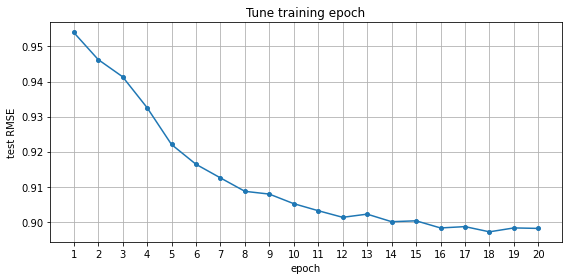

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax.plot(np.arange(len(epoch_test_RMSE_list)) + 1, epoch_test_RMSE_list, marker='.', linewidth=1.5, markersize=8)
ax.set_xticks(np.arange(len(epoch_test_RMSE_list)) + 1)
ax.set_ylabel('test RMSE')
ax.set_xlabel('epoch')
ax.set_title('Tune training epoch')
ax.grid(True)
plt.tight_layout()
plt.show()


Based on this plot, what is the best epoch for your MF model?

*Write your answer here.*
18th Epoch gives the best RMSE of 0.897.

#### Tune latent dimension####

By this figure, you can find the best epoch for your MF model. Similarly, you can plot how the test RMSE changes when you set different latent dimensions. For this, you need to run the code to initialize and train the MF model for multiple times with different settings of 'latent'. Please run the MF model with 'latent' as {1,3,5,7,9}, and plot the corresponding test RMSE for these five different latent dimensions in the next cell. 

**Note that for these five runs of experiments, record the test RMSE after E training epochs -- E is the best epoch you find by the 'Tune training epoch' plot. And here, fix regularization weight as 0.001**.

**Note that the expected output of the next cell is just the plot, you don't need to show the code and printing of the experiment with different 'latent' here.**

In [ ]:
# Your Code Here...
latent = [1, 3, 5, 7, 9]
epoch_loss_list = {}
epoch_test_RMSE_list = {}
for l in latent:
  mf = MF(train_mat, test_mat, latent=l, lr=0.01, reg=0.001)
  epoch_loss_list[l], epoch_test_RMSE_list[l] = mf.train(epoch=18)
  print("latent dimensions= {}, loss:{}, RMSE:{}".format(l, epoch_loss_list[l][-1], epoch_test_RMSE_list[l][-1]))

latent dimensions= 1, loss:603087.31026734, RMSE:0.9427599860297795
latent dimensions= 3, loss:526220.5162935572, RMSE:0.9054267710551465
latent dimensions= 5, loss:491339.9564066862, RMSE:0.8972356453367204
latent dimensions= 7, loss:467755.52931961394, RMSE:0.8988417783447445
latent dimensions= 9, loss:445299.4783071362, RMSE:0.9046721157997826


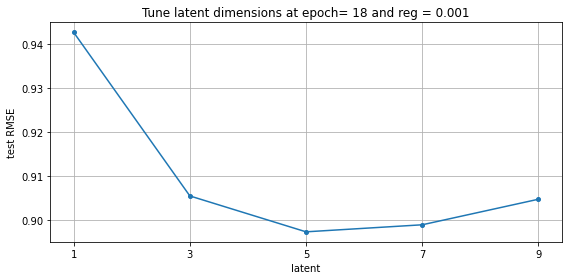

In [ ]:
values = []
for l in latent:
  values.append(epoch_test_RMSE_list[l][-1])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax.plot(latent, values, marker='.', linewidth=1.5, markersize=8)
ax.set_xticks(latent)
ax.set_ylabel('test RMSE')
ax.set_xlabel('latent')
ax.set_title('Tune latent dimensions at epoch= 18 and reg = 0.001')
ax.grid(True)
plt.tight_layout()
plt.show()  

Based on this plot, what is the best latent dimension for your MF model?

Based on the above plot, for 18th Epoch, latent dimension = 5 gives best RMSE of 0.897.

#### Tune regularization weight####

Last, you can plot how the test RMSE changes when you set different regularization weight. Please run the MF model with 'reg' as {0.0001,0.0005,0.001,0.0015,0.002}, and plot corresponding test RMSE for these five different regularization weights in the next cell. 

**Note that for these five runs of experiments, record the test RMSE after E training epochs -- E is the best epoch you find by the 'Tune training epoch' plot. And here, fix latent dimension as the one you find the best by the previous part**

**Note that the expected output of the next cell is just the plot, you don't need to show the code and printing of the experiment with different 'reg' here.**

In [ ]:
# Your Code Here...
regs = [0.0001, 0.0005, 0.001, 0.0015, 0.002]
epoch_loss_list = {}
epoch_test_RMSE_list = {}
for reg in regs:
  mf = MF(train_mat, test_mat, latent=5, lr=0.01, reg=reg)
  epoch_loss_list[reg], epoch_test_RMSE_list[reg] = mf.train(epoch=18)
  print("regularization wt decay:{}, loss:{}, RMSE:{}".format(reg, epoch_loss_list[reg][-1], epoch_test_RMSE_list[reg][-1]))

regularization wt decay:0.0001, loss:491021.0794368209, RMSE:0.8975851249205172
regularization wt decay:0.0005, loss:492459.6449643698, RMSE:0.8977439736713998
regularization wt decay:0.001, loss:494644.8022501931, RMSE:0.900631743297415
regularization wt decay:0.0015, loss:491116.2417865178, RMSE:0.8953396341784213
regularization wt decay:0.002, loss:493126.5870797668, RMSE:0.8975709997101469


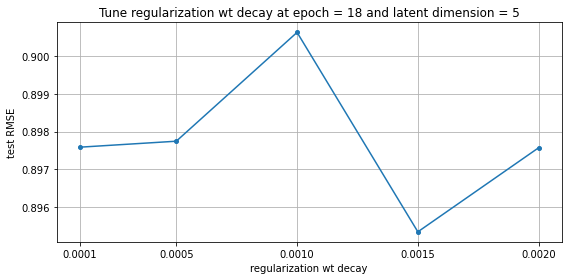

In [ ]:
values = []
for reg in regs:
  values.append(epoch_test_RMSE_list[reg][-1])
  
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax.plot(regs, values, marker='.', linewidth=1.5, markersize=8)
ax.set_xticks(regs)
ax.set_ylabel('test RMSE')
ax.set_xlabel('regularization wt decay')
ax.set_title('Tune regularization wt decay at epoch = 18 and latent dimension = 5')
ax.grid(True)
plt.tight_layout()
plt.show()  

Based on this plot, what is the best regularization weight for your MF model?


Based on the above plot, at 18 Epoch and latent dimension = 5, reg wt decay of 0.0015 gives the best RMSE of 0.895.

## Part 3e: Improve the Model (10 points)

Next, you need to try your best to improve the model so that we can improve our RMSE! This is open-ended, so feel free to try whatever tricks you like. We talked about several in class, plus you can find more in the readings. Write your code in the next cell and print out the RMSE of your new model.

In [ ]:
from sklearn.metrics import mean_squared_error

class MF_SVD():
    def __init__(self, train_mat, test_mat, latent=5, learning_rate=0.001):
      
        self.train_mat = train_mat
        self.test_mat = test_mat
        self.latent = latent
        
       
        self.num_users, self.num_movies = train_mat.shape
        self.sample_row, self.sample_col = self.train_mat.nonzero()
        self.n_samples = len(self.sample_row)
        
        self.item_fact_reg = 0.0
        self.user_fact_reg = 0.0
        self.item_bias_reg = 0.0
        self.user_bias_reg = 0.0

        self.P = np.random.normal(scale=1./self.latent,
                                          size=(self.num_users, self.latent))
        self.Q = np.random.normal(scale=1./self.latent,
                                          size=(self.num_movies, self.latent))
        
        self.learning_rate = learning_rate
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_movies)
        self.mu = np.mean(self.train_mat[np.where(self.train_mat != 0)])
    
    def train(self, epochs=20):
        
        self.RMSE = []
        for ep in range(epochs):      
          self.training_indices = np.arange(self.n_samples)
          np.random.shuffle(self.training_indices)
          self.svd()

          predictions = self.predict()

          self.RMSE += [self.rmse(predictions, self.test_mat)]
          print ("Epoch:{}, RMSE:{}".format(ep, self.RMSE[-1]))
        
        return self.RMSE  


    def svd(self):
        for idx in self.training_indices:
            u = self.sample_row[idx]
            i = self.sample_col[idx]
            prediction = self.get_rui(u, i)
            err_ui = (self.train_mat[u,i] - prediction) 
            
            
            self.b_u[u] += self.learning_rate * \
                                (err_ui - self.user_bias_reg * self.b_u[u])
            self.b_i[i] += self.learning_rate * \
                                (err_ui - self.item_bias_reg * self.b_i[i])
            
            new_p = self.P[u, :] + self.learning_rate * \
                                    (err_ui * self.Q[i, :] - \
                                     self.user_fact_reg * self.P[u,:])
            new_q = self.Q[i, :] + self.learning_rate * \
                                    (err_ui * self.P[u, :] - \
                                     self.item_fact_reg * self.Q[i,:])
            
            self.P[u, :] = new_p
            self.Q[i, :] = new_q

    def get_rui(self, u, i):
        rui = self.mu + self.b_u[u] + self.b_i[i]
        rui += self.P[u, :].dot(self.Q[i, :].T)
        return rui
    
    def predict(self):
        predictions = np.zeros((self.P.shape[0], 
                                self.Q.shape[0]))
        for u in range(self.P.shape[0]):
            for i in range(self.Q.shape[0]):
                predictions[u, i] = self.get_rui(u, i)
                
        return predictions

    def rmse(self, pred, actual):
        pred = pred[actual.nonzero()].flatten()
        actual = actual[actual.nonzero()].flatten()
        return mean_squared_error(pred, actual)  


In [ ]:
svd = MF_SVD(train_mat, test_mat, latent=5, learning_rate=0.001)
svd.train(epochs=20)

Epoch:0, RMSE:1.0446599960908396
Epoch:1, RMSE:0.9710520947645145
Epoch:2, RMSE:0.9330376285806136
Epoch:3, RMSE:0.9098412575669226
Epoch:4, RMSE:0.8942532494926274
Epoch:5, RMSE:0.8830044796896072
Epoch:6, RMSE:0.8745012704251997
Epoch:7, RMSE:0.8678188216433722
Epoch:8, RMSE:0.8624712676663434
Epoch:9, RMSE:0.8581265780892927
Epoch:10, RMSE:0.854527775768535
Epoch:11, RMSE:0.8514726715195138
Epoch:12, RMSE:0.8488770045582646
Epoch:13, RMSE:0.8466723879518461
Epoch:14, RMSE:0.8447756814370379
Epoch:15, RMSE:0.843117146404833
Epoch:16, RMSE:0.8416639438726657
Epoch:17, RMSE:0.8404066751293858
Epoch:18, RMSE:0.8392968456821732
Epoch:19, RMSE:0.838312627534517


[1.0446599960908396,
 0.9710520947645145,
 0.9330376285806136,
 0.9098412575669226,
 0.8942532494926274,
 0.8830044796896072,
 0.8745012704251997,
 0.8678188216433722,
 0.8624712676663434,
 0.8581265780892927,
 0.854527775768535,
 0.8514726715195138,
 0.8488770045582646,
 0.8466723879518461,
 0.8447756814370379,
 0.843117146404833,
 0.8416639438726657,
 0.8404066751293858,
 0.8392968456821732,
 0.838312627534517]

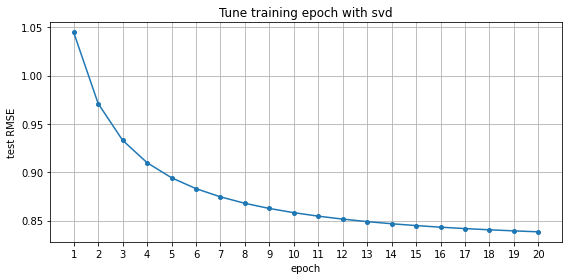

In [ ]:
import matplotlib.pyplot as plt

rmse_list = svd.RMSE

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax.plot(np.arange(len(rmse_list)) + 1, rmse_list, marker='.', linewidth=1.5, markersize=8)
ax.set_xticks(np.arange(len(rmse_list)) + 1)
ax.set_ylabel('test RMSE')
ax.set_xlabel('epoch')
ax.set_title('Tune training epoch with svd')
ax.grid(True)
plt.tight_layout()
plt.show()

And please briefly explain what your new model does to improve the performance.

SVD is well established for identifying latent semantic
factors. However, applying SVD to explicit ratings in the CF domain raises difficulties due to the high portion of missing values. Conventional SVD is undefined
when knowledge about the matrix is incomplete. Moreover, carelessly addressing
only the relatively few known entries is highly prone to overfitting. 

This new model uses SVD from “Factorization meets the neighborhood” by Yehuda Koren(2008) that was discussed in class as an improvement to Matrix Factorization. It takes into account baseline estimate along with latent factors as estimated rating. This model exploits both implicit and explicit feedback by the users. 

Here loss function becomes,
<center>$\underset{\mathbf{P},\mathbf{Q}}{\text{min}}\,\,L=\sum_{(u,i)\in\mathcal{O}}( r_{u,i} - \mu - b_i - b_u - \mathbf{P}_u^T\cdot\mathbf{Q}_i)^2+\lambda(\lVert\mathbf{P}\rVert^2_{\text{F}}+\lVert\mathbf{Q}\rVert^2_{\text{F}}  + b_u^2 + b_i^2)$,</center>


Then we make our prediction using,

<center> $\hat{r}_{ui} = b_{ui} + \mathbf{P}_u^T\cdot\mathbf{Q}_i $</center>